# **Import data and check for missing values**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [ ]:
# Mengimport data
df = pd.read_csv('Data Train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# **EDA**

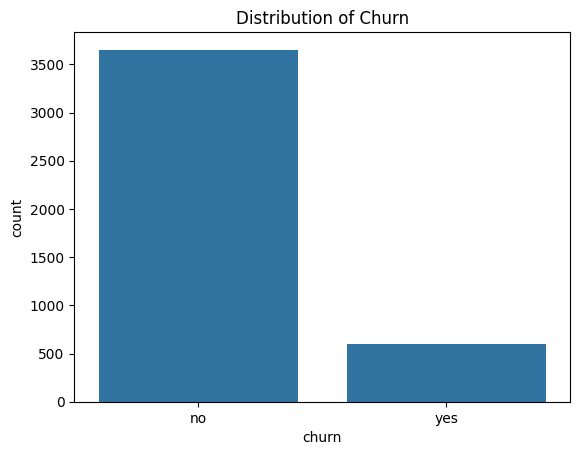

In [ ]:
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()

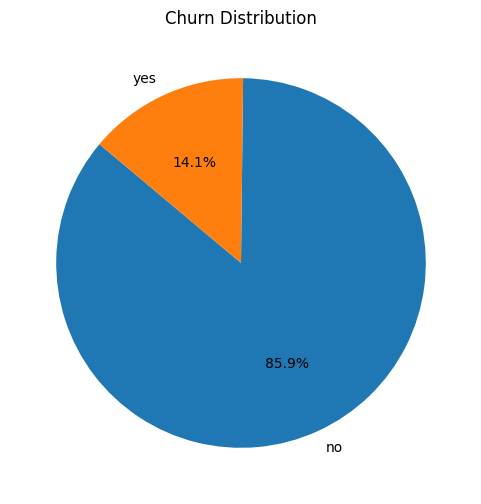

In [ ]:
# Menghitung jumlah pengamatan untuk setiap kategori churn
churn_counts = df['churn'].value_counts()

# Menghitung persentase dari total untuk setiap kategori churn
churn_percentage = df['churn'].value_counts(normalize=True) * 100

# Plot diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

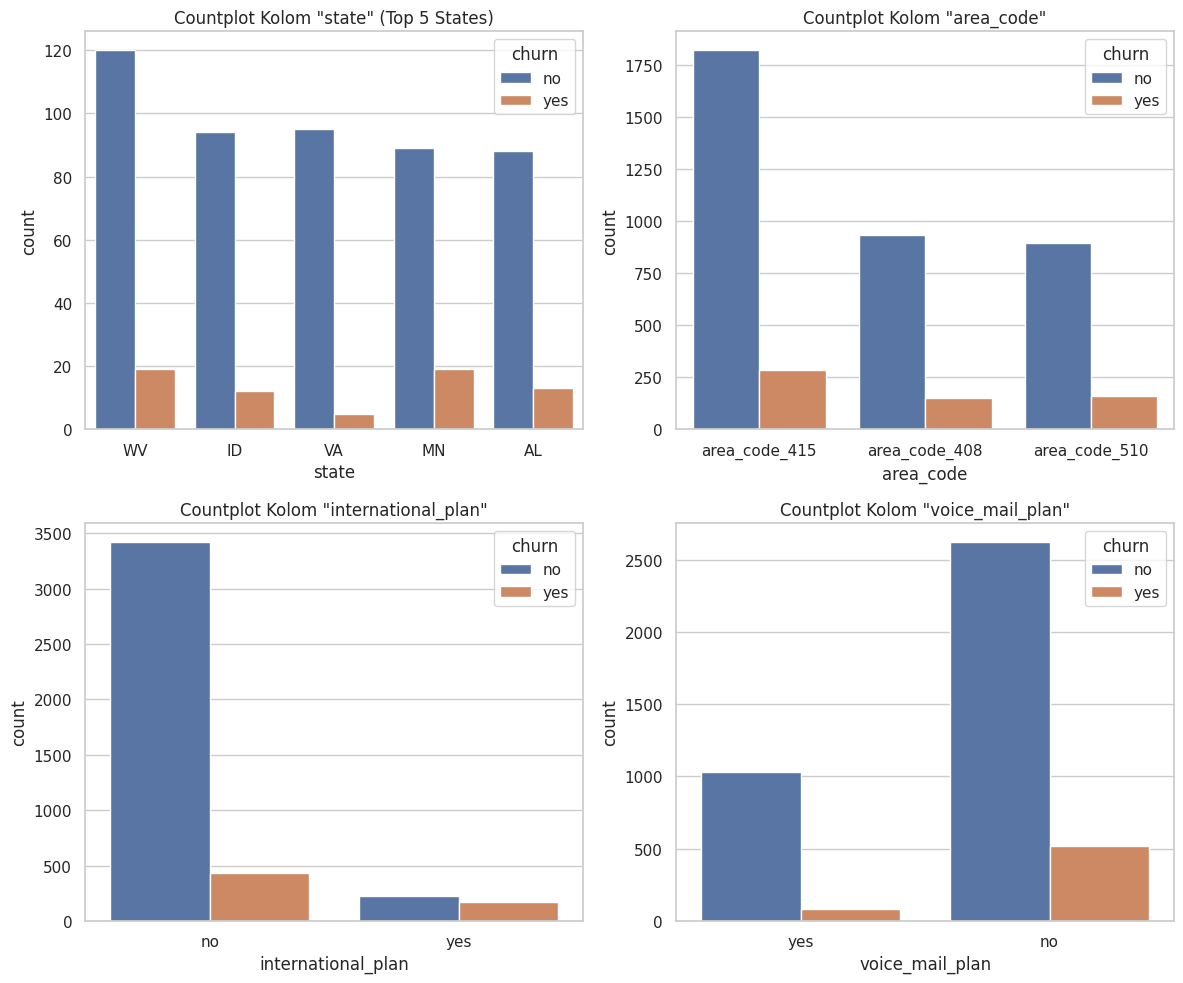

In [ ]:
# Data Kategorik
sns.set(style="whitegrid")

# Membuat subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Mengambil lima data tertinggi dari nilai 'state' yang paling sering muncul
top_5_states = df['state'].value_counts().nlargest(5).index.tolist()

# Filter data berdasarkan lima negara bagian teratas
df_top_states = df[df['state'].isin(top_5_states)]

# Countplot untuk kolom 'state' berdasarkan 'Churn'
sns.countplot(x='state', hue='churn', data=df_top_states, ax=axes[0, 0])
axes[0, 0].set_title('Countplot Kolom "state" (Top 5 States)')

# Countplot untuk kolom 'area_code' berdasarkan 'Churn'
sns.countplot(x='area_code', hue='churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Countplot Kolom "area_code"')

# Countplot untuk kolom 'international_plan' berdasarkan 'Churn'
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Countplot Kolom "international_plan"')

# Countplot untuk kolom 'voice_mail_plan' berdasarkan 'Churn'
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Countplot Kolom "voice_mail_plan"')

# Mengatur layout
plt.tight_layout()
plt.show()

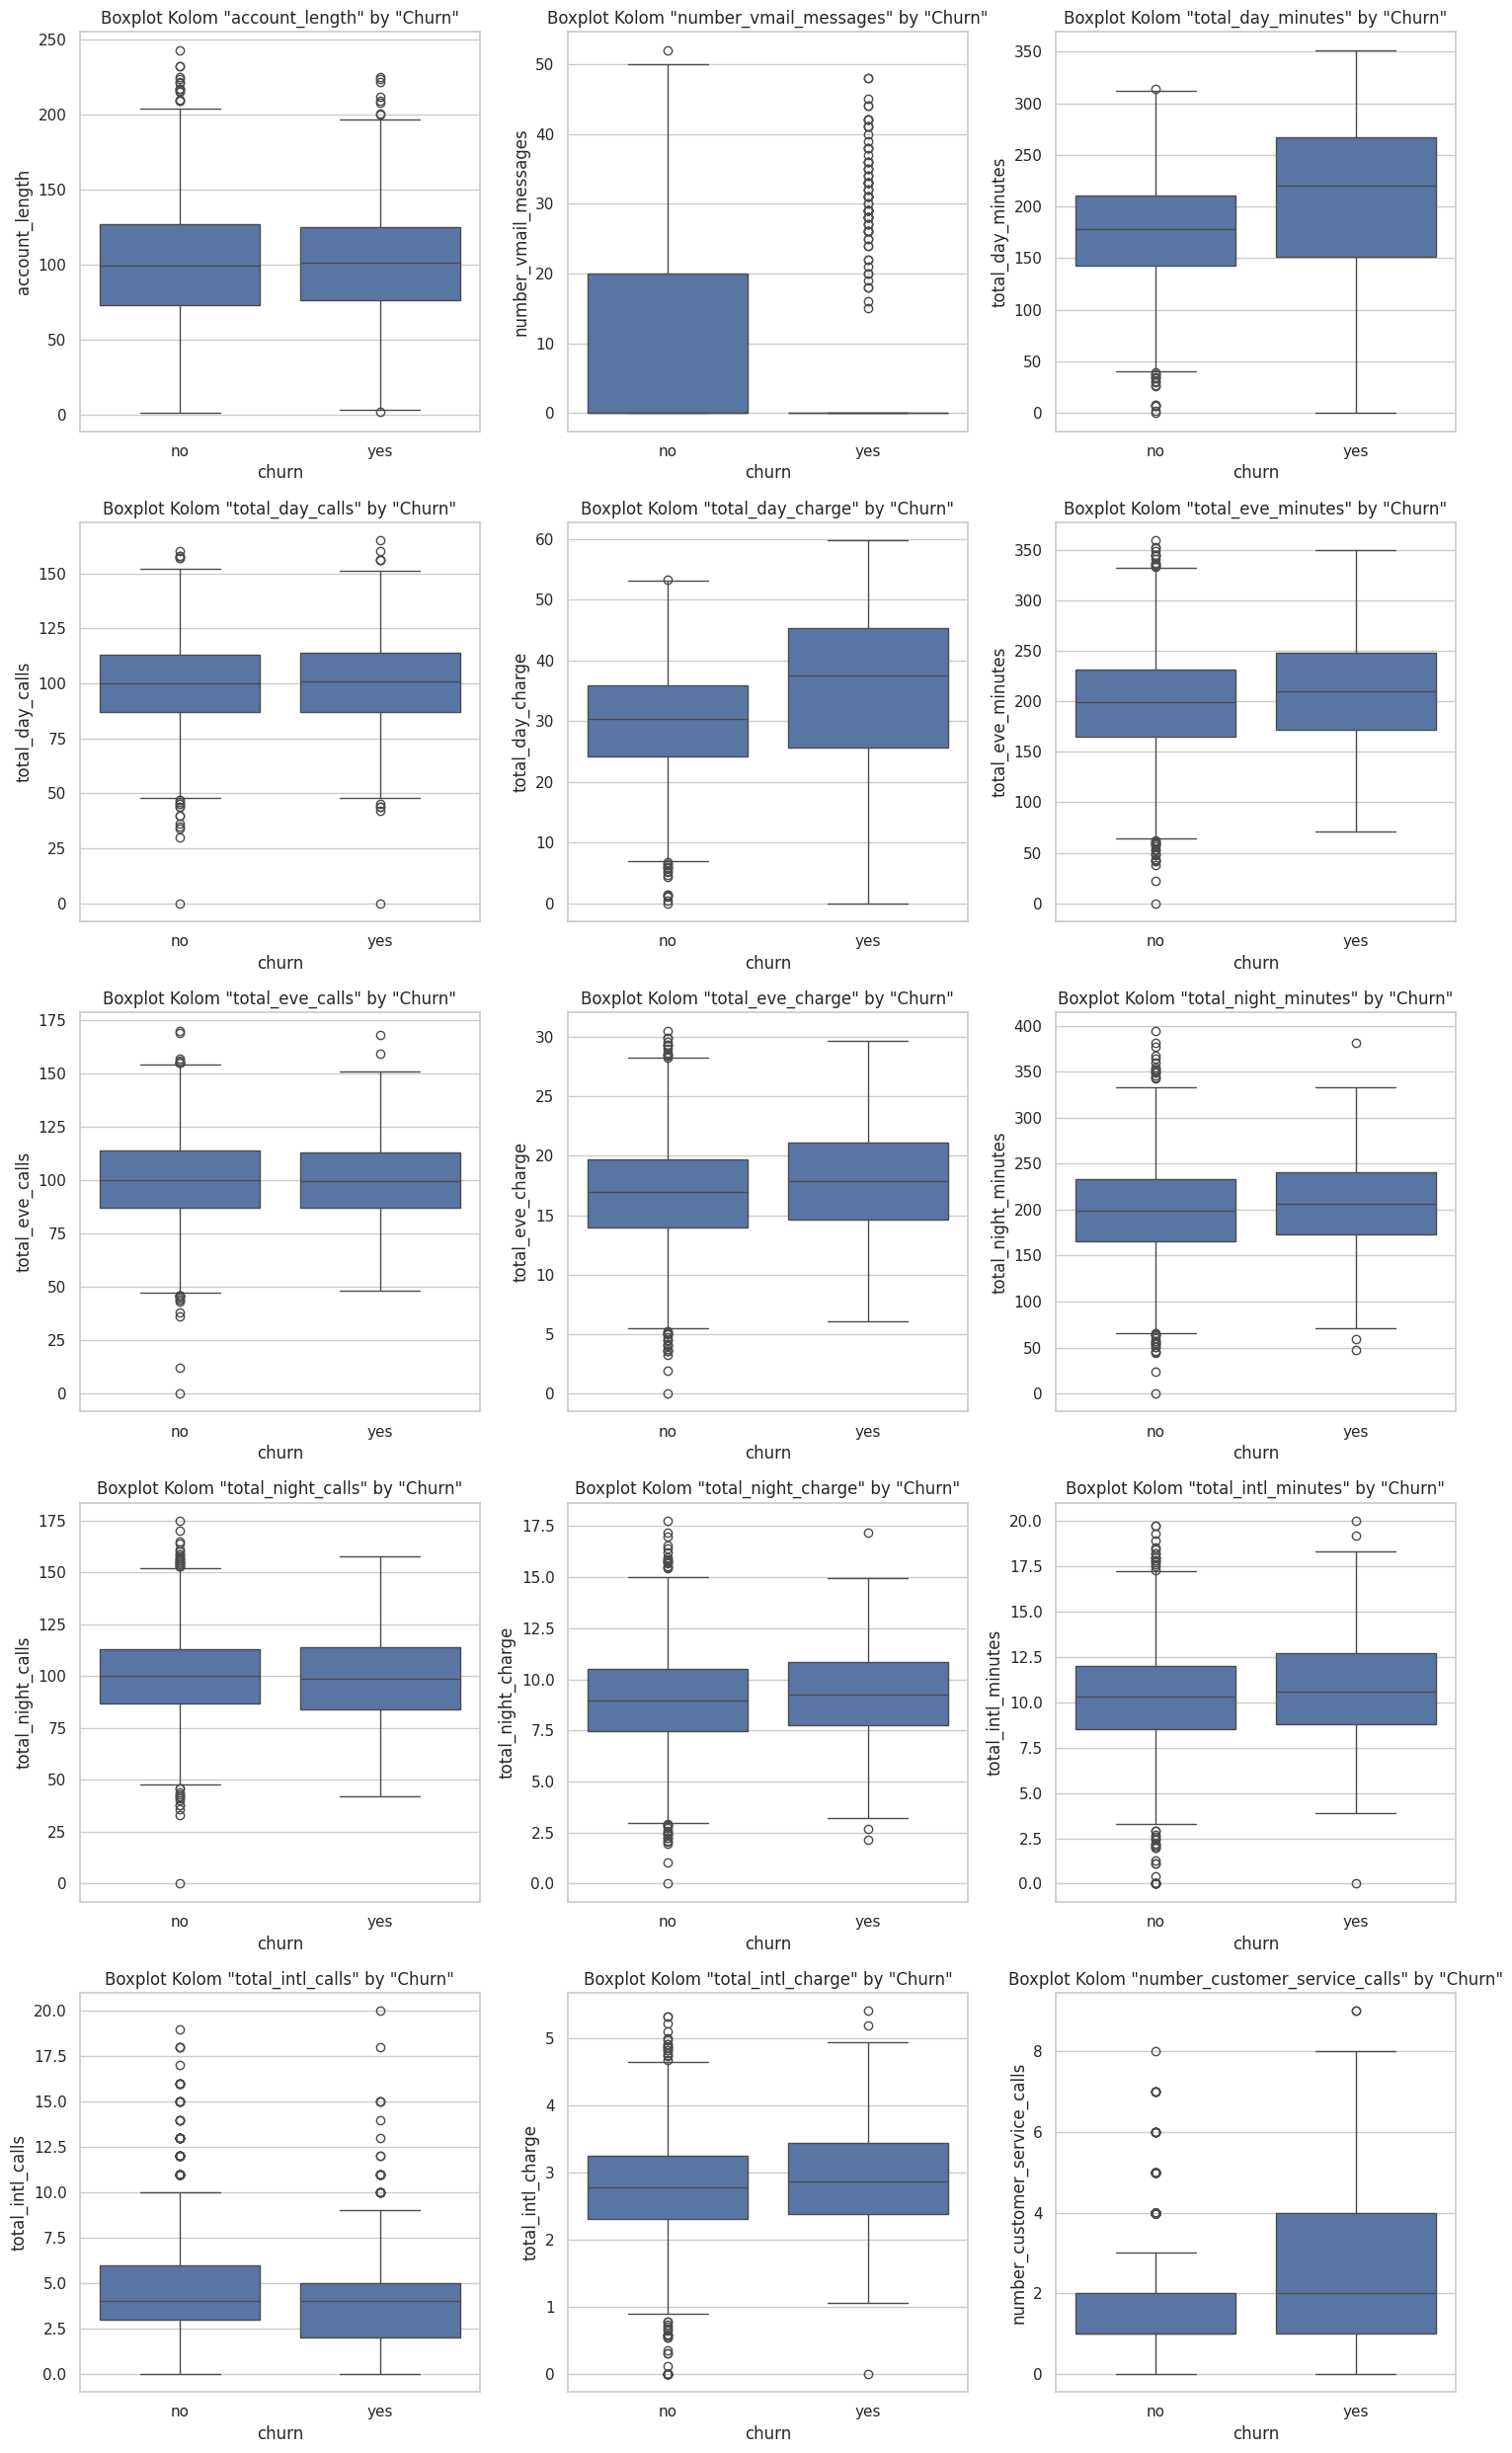

In [ ]:
# Mendapatkan daftar kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Mengatur jumlah subplot per baris
num_cols_per_row = 3

# Menghitung jumlah baris yang diperlukan
num_rows = (len(numeric_columns) + num_cols_per_row - 1) // num_cols_per_row

# Membuat subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5*num_rows))

# Loop melalui setiap kolom numerik dan membuat boxplot berdasarkan 'Churn'
for i, col in enumerate(numeric_columns):
    ax = axes[i//num_cols_per_row, i%num_cols_per_row]
    sns.boxplot(x='churn', y=col, data=df, ax=ax)
    ax.set_title(f'Boxplot Kolom "{col}" by "Churn"')

# Mengatur layout
plt.tight_layout()
plt.show()

# **Data Preprocessing**

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah menghilangkan outlier: 4031


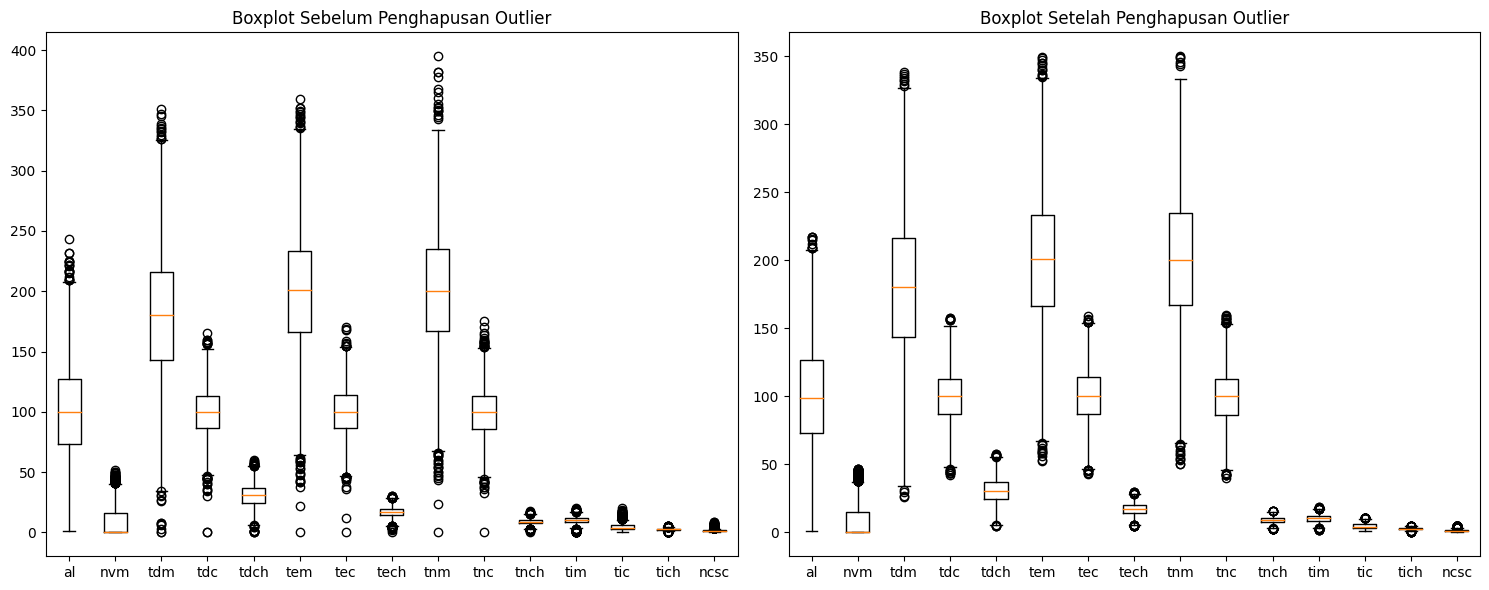

In [ ]:
from scipy import stats

# Mendapatkan daftar nama kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns[:15]

# Ubah nama kolom menjadi singkatan
singkatan = {'account_length': 'al', 'number_vmail_messages': 'nvm','total_day_minutes': 'tdm', 'total_day_calls': 'tdc', 'total_day_charge': 'tdch',
             'total_eve_minutes': 'tem', 'total_eve_calls': 'tec', 'total_eve_charge': 'tech','total_night_charge':'tnch',
             'total_night_calls': 'tnc', 'total_night_minutes': 'tnm', 'total_intl_minutes': 'tim', 'total_intl_calls': 'tic',
             'total_intl_charge': 'tich', 'number_customer_service_calls':'ncsc'}
df_numeric = df[numeric_columns].rename(columns=singkatan)

# Boxplot sebelum penghapusan outlier
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_numeric.values, labels=df_numeric.columns)
plt.title('Boxplot Sebelum Penghapusan Outlier')

# Filter outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in df_numeric.columns:
    zscore = abs(stats.zscore(df_numeric[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# DataFrame setelah penghapusan outlier
df_filtered = df[filtered_entries]

print(f'Jumlah baris setelah menghilangkan outlier: {len(df_filtered)}')

# Boxplot setelah penghapusan outlier
plt.subplot(1, 2, 2)
plt.boxplot(df_filtered[numeric_columns].values, labels=df_numeric.columns)
plt.title('Boxplot Setelah Penghapusan Outlier')

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(['churn'], axis=1)
y = df['churn'].apply(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# membagi jenis kolom
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [ ]:
# Handling missing values

# Numerical
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# **Model training**

In [ ]:
# Random Forest
RF = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))])

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print(f"Accuracy: {(accuracy_score(y_test, y_pred))*100} %")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred,colnames=['Predicted'],margins=True)

Accuracy: 95.141065830721 %

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       537
           1       0.88      0.80      0.84       101

    accuracy                           0.95       638
   macro avg       0.92      0.89      0.91       638
weighted avg       0.95      0.95      0.95       638



Predicted,0,1,All
churn,,,
0,526,11,537
1,20,81,101
All,546,92,638


In [ ]:
# XGB
XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))])

XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

print(f"Accuracy: {(accuracy_score(y_test, y_pred))*100} %")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred,colnames=['Predicted'],margins=True)

Accuracy: 96.70846394984326 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       537
           1       0.93      0.85      0.89       101

    accuracy                           0.97       638
   macro avg       0.95      0.92      0.94       638
weighted avg       0.97      0.97      0.97       638



Predicted,0,1,All
churn,,,
0,531,6,537
1,15,86,101
All,546,92,638


# **GridSearchCV**

In [ ]:
#GridSearchCV Random Forest
params = {
    'clf__min_samples_leaf':[1,10,15],
    'clf__max_depth':[None,10,20],
    'clf__n_estimators':[100,250]

}
modelRF = GridSearchCV(RF, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='recall')
modelRF.fit(X_train, y_train)

#Evaluasi
print("Best parameters:", modelRF.best_params_)
print("Training recall score:", recall_score(y_train, modelRF.predict(X_train)))
print("Validation recall score:", modelRF.best_score_)
print("Test recall score:", recall_score(y_test, modelRF.predict(X_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 10, 'clf__n_estimators': 250}
Training recall score: 0.8551307847082495
Validation recall score: 0.7525252525252526
Test recall score: 0.8217821782178217


In [ ]:
#GridSearchCV XGB
params = {
    'xgb__learning_rate': [0.3,0.2, 0.1],
    'xgb__max_depth': [6,10,15],
    'xgb__gamma':[0,0.5,1],
    'xgb__subsample':[0.8,1],
    'xgb__n_estimators':[100,400,500]
}

modelXGB= GridSearchCV(XGB, param_grid=params, cv=5, n_jobs=-1, verbose=2)
modelXGB.fit(X_train, y_train)

#Evaluasi
print("Best parameters:", modelXGB.best_params_)
print("Training recall score:", recall_score(y_train, modelXGB.predict(X_train)))
print("Validation recall score:", modelXGB.best_score_)
print("Test recall score:", recall_score(y_test, modelXGB.predict(X_test)))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 400, 'xgb__subsample': 1}
Training recall score: 0.9979879275653923
Validation recall score: 0.9576430155975219
Test recall score: 0.8712871287128713


# **Feature Importance**

In [ ]:
# Random Forest
bestModelRF = modelRF.best_estimator_

y_pred = bestModelRF.predict(X_test)

In [ ]:
  feature_names = bestModelRF.named_steps['preprocessor'].get_feature_names_out()

  # Dapatkan feature importance dari model Random Forest
  feature_importances = bestModelRF.named_steps['clf'].feature_importances_

  # Gabungkan nama fitur dan feature importance
  feature_importance_list = list(zip(feature_names, feature_importances))

  # Urutkan berdasarkan feature importance (dalam urutan menurun)
  sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

  # Tampilkan hasilnya
  for feature_name, importance in sorted_feature_importance:
      print(f"Feature: {feature_name}, Importance: {importance}")

Feature: num__number_customer_service_calls, Importance: 0.14796694262573296
Feature: num__total_day_charge, Importance: 0.1318327086013685
Feature: num__total_day_minutes, Importance: 0.12927997973832417
Feature: cat__international_plan_yes, Importance: 0.07580969880731767
Feature: cat__international_plan_no, Importance: 0.07131192889291517
Feature: cat__area_code_area_code_415, Importance: 0.04411702761253835
Feature: num__total_intl_calls, Importance: 0.04017224561140326
Feature: num__total_eve_minutes, Importance: 0.03274486662461902
Feature: cat__area_code_area_code_510, Importance: 0.03139616806812079
Feature: num__total_eve_charge, Importance: 0.030574531733975754
Feature: cat__voice_mail_plan_yes, Importance: 0.024895539010347866
Feature: cat__area_code_area_code_408, Importance: 0.023505889671685307
Feature: cat__voice_mail_plan_no, Importance: 0.020915130406924234
Feature: num__number_vmail_messages, Importance: 0.020150552398715493
Feature: num__total_intl_charge, Importance

Dari hasil feature importance dilihat bahwa semua feature berkontribusi dengan baik, sehingga kami tetap menggunakan semua featurenya.

In [ ]:
# XGBoost
bestModelXGB = modelXGB.best_estimator_

y_pred = bestModelXGB.predict(X_test)

# **Predict After Tuning**

In [ ]:
# Random Forest
y_pred = bestModelRF.predict(X_test)
print(f"Accuracy: {(accuracy_score(y_test, y_pred))*100} %")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred,colnames=['Predicted'],margins=True)

Accuracy: 93.10344827586206 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       537
           1       0.76      0.82      0.79       101

    accuracy                           0.93       638
   macro avg       0.86      0.89      0.87       638
weighted avg       0.93      0.93      0.93       638



Predicted,0,1,All
churn,,,
0,511,26,537
1,18,83,101
All,529,109,638


In [ ]:
# XGB
y_pred = bestModelXGB.predict(X_test)
print(f"Accuracy: {(accuracy_score(y_test, y_pred))*100} %")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred,colnames=['Predicted'],margins=True)

Accuracy: 96.70846394984326 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       537
           1       0.92      0.87      0.89       101

    accuracy                           0.97       638
   macro avg       0.95      0.93      0.94       638
weighted avg       0.97      0.97      0.97       638



Predicted,0,1,All
churn,,,
0,529,8,537
1,13,88,101
All,542,96,638


# **Menggunakan Data test Yang disediakan**

In [ ]:
df_test = pd.read_csv('Data Test.csv')

In [ ]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
# Outliers
from scipy import stats
df = df_test
num_col = df_test.select_dtypes(include=['int64', 'float64']).columns
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in num_col:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df_test = df[filtered_entries]

print(f'Jumlah baris setelah menghilangkan outlier: {len(df_test)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah menghilangkan outlier: 707


In [ ]:
x_test = df_test.drop(['id'], axis=1)

# **Data Test Preprocessing**

In [ ]:
# membagi jenis kolom
numerical_cols = x_test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x_test.select_dtypes(include=['object', 'bool']).columns

In [ ]:
# Handling missing values

# Numerical
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# **Memprediksi Data dengan Best Model Random forest**

In [ ]:
RF = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=250,min_samples_leaf=10,random_state=42))])
# clf__max_depth': None, 'clf__min_samples_leaf': 10, 'clf__n_estimators': 250

In [ ]:
#bestModelRF = modelRF.best_estimator_
# Melakukan prediksi dengan model Random Forest terbaik
RF.fit(X_train, y_train)
prediksi = RF.predict(x_test)

# Menampilkan prediksi
predict_df = pd.DataFrame(df_test['id'])
predict_df['Churn'] = prediksi
predict_df.head()

# Menyimpan dalam bentuk csv
#results_df = pd.DataFrame({'id': df_test['id'], 'churn_prediction': prediksi})
#results_df.to_csv('churn_predictions_rf.csv', index=False)

,id,Churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


# **Memprediksi data dengan Best Model XGB**

In [ ]:
XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(gamma=0,Learning_rate=0.1, max_depth=6, n_estimators=400,subsample=1, random_state=42))])
# 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 400, 'xgb__subsample': 1

In [ ]:
# Melakukan prediksi dengan model XGBoost terbaik
XGB.fit(X_train, y_train)
prediksi = XGB.predict(x_test)

# Menampilkan prediksi
predict_df = pd.DataFrame(df_test['id'])
predict_df['Churn'] = prediksi
predict_df.head()

# Menyimpan dalam bentuk csv
#results_df = pd.DataFrame({'id': df_test['id'], 'churn_prediction': prediksi})
#results_df.to_csv('churn_predictions_xgb.csv', index=False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Learning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


,id,Churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


Referensi

https://jurnal.iaii.or.id/index.php/RESTI/article/view/4933

https://www.scaler.com/topics/machine-learning/customer-churn-prediction/

https://youtu.be/mPnR2bufHZI?si=TD2hghXVYImMPz8a